# Fake News Prediction Model using NLP

### Importing supporting libraries 

In [1]:
import pandas as pd
import numpy as np
import nltk
import re
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [2]:
import matplotlib.pyplot as plt

### Loading Data

In [3]:
data = pd.read_csv('train.csv')

In [4]:
data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


### Data Pre-Processing

In [5]:
data.isna().any()

id        False
title      True
author     True
text       True
label     False
dtype: bool

In [6]:
data.dropna(inplace=True)
data.reset_index(inplace=True)

In [7]:
data.head()

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [8]:
X = data.drop('label',axis=1)
y = data.label

#### Data Cleaning !

In [9]:
stopwords = stopwords.words('english')

In [10]:
lem = WordNetLemmatizer()

In [11]:
news_data = []
for i in range(0,len(data)):
    news = re.sub('^[a-zA-z]'," ",data.title[i])
    news = news.lower()
    words_in_news = nltk.word_tokenize(news)
    pre_prosessed_words = []
    for w in words_in_news:
        if (w not in stopwords) and (w not in pre_prosessed_words):
            pre_prosessed_words.append(lem.lemmatize(w))
    final_news = ' '.join(pre_prosessed_words)
    news_data.append(final_news)    

In [ ]:
news_data

### One - Hot Encoding

In [12]:
vocabulary_size = 10000

In [13]:
one_hot_news = []

In [14]:
for news in news_data:
    one_hot_news.append(one_hot(news,vocabulary_size))

In [15]:
one_hot_news = pad_sequences(one_hot_news,maxlen=20)

In [16]:
one_hot_news.shape

(18285, 20)

In [17]:
one_hot_news[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0, 1984, 1897,
       7350,   43, 1176, 1597, 8875, 8840, 5891, 5158, 4384], dtype=int32)

#### Creating Model

In [18]:
features = 50
model = Sequential()
model.add(Embedding(vocabulary_size,features,input_length=20))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 50)            500000    
_________________________________________________________________
lstm (LSTM)                  (None, 100)               60400     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 560,501
Trainable params: 560,501
Non-trainable params: 0
_________________________________________________________________


In [53]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [20]:
len(y)

18285

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
xtrain,xtest,ytrain,ytest = train_test_split(one_hot_news,y,train_size = 0.7,random_state = 1)

In [56]:
final_model = model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=10,batch_size=65)

Epoch 1/10
197/197 [==============================] - 5s 23ms/step - loss: 0.3116 - accuracy: 0.8543 - val_loss: 0.1580 - val_accuracy: 0.9304
Epoch 2/10
197/197 [==============================] - 4s 20ms/step - loss: 0.1049 - accuracy: 0.9603 - val_loss: 0.1810 - val_accuracy: 0.9336
Epoch 3/10
197/197 [==============================] - 4s 20ms/step - loss: 0.0548 - accuracy: 0.9828 - val_loss: 0.2503 - val_accuracy: 0.9282
Epoch 4/10
197/197 [==============================] - 4s 21ms/step - loss: 0.0272 - accuracy: 0.9922 - val_loss: 0.2594 - val_accuracy: 0.9256
Epoch 5/10
197/197 [==============================] - 5s 26ms/step - loss: 0.0148 - accuracy: 0.9960 - val_loss: 0.3167 - val_accuracy: 0.9342
Epoch 6/10
197/197 [==============================] - 5s 26ms/step - loss: 0.0102 - accuracy: 0.9970 - val_loss: 0.3371 - val_accuracy: 0.9326
Epoch 7/10
197/197 [==============================] - 5s 24ms/step - loss: 0.0055 - accuracy: 0.9981 - val_loss: 0.3934 - val_accuracy: 0.9311

### Prediction

In [57]:
xtest

array([[   0,    0,    0, ...,  861, 5578, 9466],
       [   0,    0,    0, ..., 3122, 6451, 7737],
       [   0,    0,    0, ..., 3035,  284, 7269],
       ...,
       [   0,    0,    0, ..., 8778, 1440, 1169],
       [   0,    0,    0, ..., 3035,  284, 7269],
       [   0,    0,    0, ..., 5430, 1259, 2665]], dtype=int32)

In [60]:
y_predicted = model.predict_classes(xtest)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [61]:
y_predicted

array([[1],
       [1],
       [0],
       ...,
       [1],
       [0],
       [0]], dtype=int32)

### Confusion Matrix

In [69]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

In [68]:
c_mat = confusion_matrix(ytest, y_predicted)

(<Figure size 504x504 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

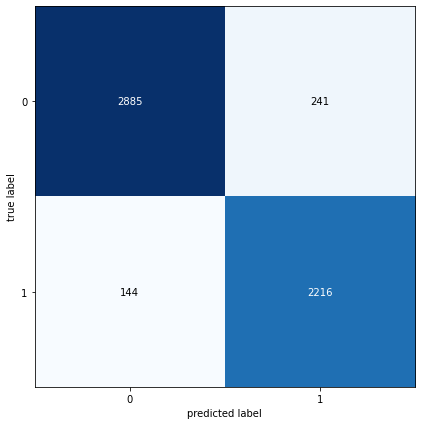

In [70]:
plot_confusion_matrix(conf_mat=c_mat,figsize=(7,7))

## Learning Curve

In [71]:
final_model.history

{'loss': [0.3116133511066437,
  0.10485271364450455,
  0.0548294372856617,
  0.02715684100985527,
  0.014778095297515392,
  0.010214087553322315,
  0.005482641980051994,
  0.0029767209198325872,
  0.0015057839918881655,
  0.0006563626229763031],
 'accuracy': [0.854285478591919,
  0.9603093862533569,
  0.9828111529350281,
  0.9921869039535522,
  0.9960153102874756,
  0.9969528913497925,
  0.9981248378753662,
  0.9991405606269836,
  0.9996093511581421,
  0.9999218583106995],
 'val_loss': [0.15800556540489197,
  0.18104681372642517,
  0.25029149651527405,
  0.259438157081604,
  0.3167196214199066,
  0.33706194162368774,
  0.3933657705783844,
  0.40494176745414734,
  0.3848848342895508,
  0.5233706831932068],
 'val_accuracy': [0.930368185043335,
  0.9336493015289307,
  0.9281808137893677,
  0.9256289005279541,
  0.9341961145401001,
  0.932555615901947,
  0.9310973286628723,
  0.9285454154014587,
  0.9274516701698303,
  0.9298213720321655]}

### Accuracy Learning Curve

Text(0, 0.5, 'Accuracy')

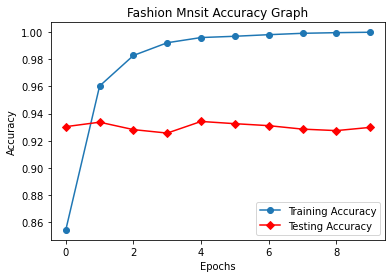

In [72]:
plt.plot(final_model.history['accuracy'],label='Training Accuracy',marker='o')
plt.plot(final_model.history['val_accuracy'],label = 'Testing Accuracy',c='red',marker='D')
plt.legend()
plt.title('Fashion Mnsit Accuracy Graph')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

### Loss Learning Curve

Text(0, 0.5, 'Loss')

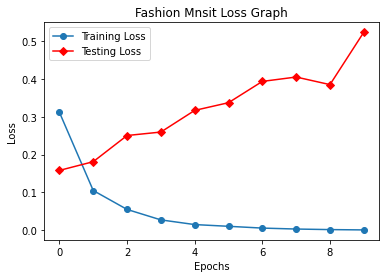

In [73]:
plt.plot(final_model.history['loss'],label='Training Loss',marker='o')
plt.plot(final_model.history['val_loss'],label = 'Testing Loss',c='red',marker='D')
plt.legend()
plt.title('Fashion Mnsit Loss Graph')
plt.xlabel('Epochs')
plt.ylabel('Loss')